# Trabalho 2

# Medidas de tendencia central e variabilidade

In [3]:
import pandas as pd
import math
import matplotlib.pyplot as plt


caminho_arquivo = 'dataset.csv'
df = pd.read_csv(caminho_arquivo)
df = df.drop('Metascore', axis=1)
df = df.dropna()

df_filtrado = df[['Ano', 'Nota', 'Votacoes']]

df['Ano'] = df['Ano'].astype(int)
df['Nota'] = df['Nota'].astype(float)
df['Votacoes'] = df['Votacoes'].astype(int)


informacoes = df.describe()
medias = informacoes.loc['mean']
medianas = informacoes.loc['50%']
std = informacoes.loc['std']
minimo = informacoes.loc['min']
maximo = informacoes.loc['max']
amplitude = maximo - minimo
var = std.apply( lambda x: x**2 )
desvios = (df_filtrado - medias).apply(lambda x: abs(x))
desv_abs_medio = desvios.sum() / informacoes.loc['count']

medidas = pd.DataFrame( columns = ['Ano', 'Nota', 'Votacoes'] )
medidas = pd.concat([medias, medianas, std, var, desv_abs_medio, minimo, maximo, amplitude], axis = 1)
medidas.columns = ['media', 'mediana', 'desv_padrao', 'variancia', 'desv_abs_medio', 'minimo', 'maximo', 'amplitude']
medidas = medidas.T

pd.set_option('display.float_format', '{:.4f}'.format)
print(medidas)

plt.show()

                     Ano   Nota          Votacoes
media          2009.2795 7.0781       358249.8038
mediana        2014.0000 7.2000       246682.0000
desv_padrao      14.6257 0.9744       386449.0279
variancia       213.9102 0.9494 149342851168.8253
desv_abs_medio   11.5324 0.7538       281040.2469
minimo         1939.0000 2.3000           89.0000
maximo         2023.0000 9.4000      2750208.0000
amplitude        84.0000 7.1000      2750119.0000


# Boxplots:

### Ano

<Axes: >

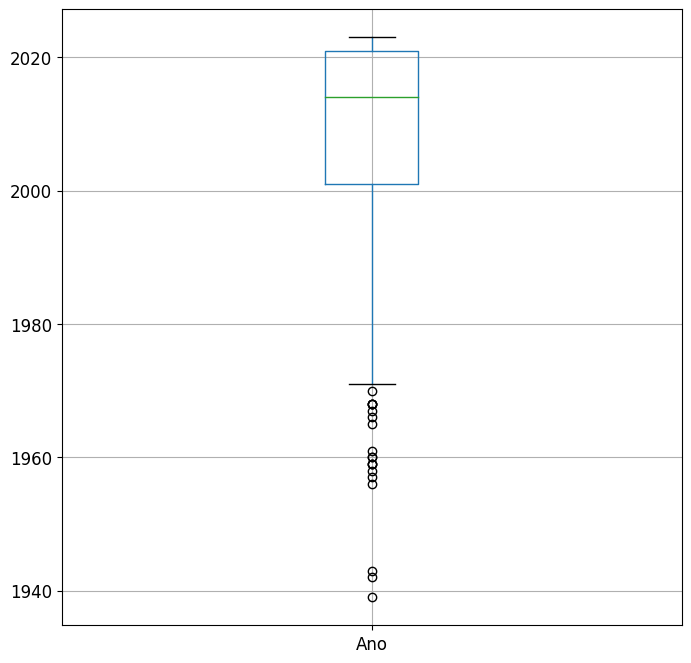

In [4]:
df_filtrado.boxplot(column=['Ano'], fontsize='large', figsize=(8,8))

### Nota

<Axes: >

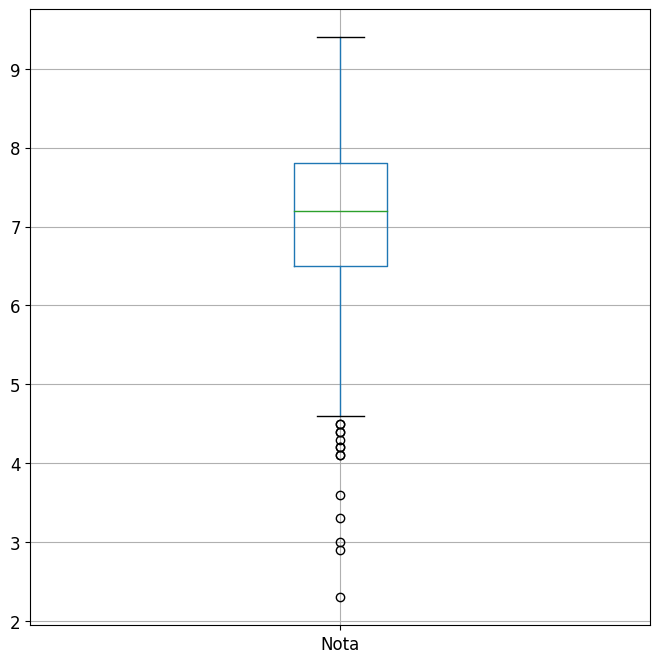

In [5]:
df_filtrado.boxplot(column=['Nota'], fontsize='large', figsize=(8,8))

### Votacões

<Axes: >

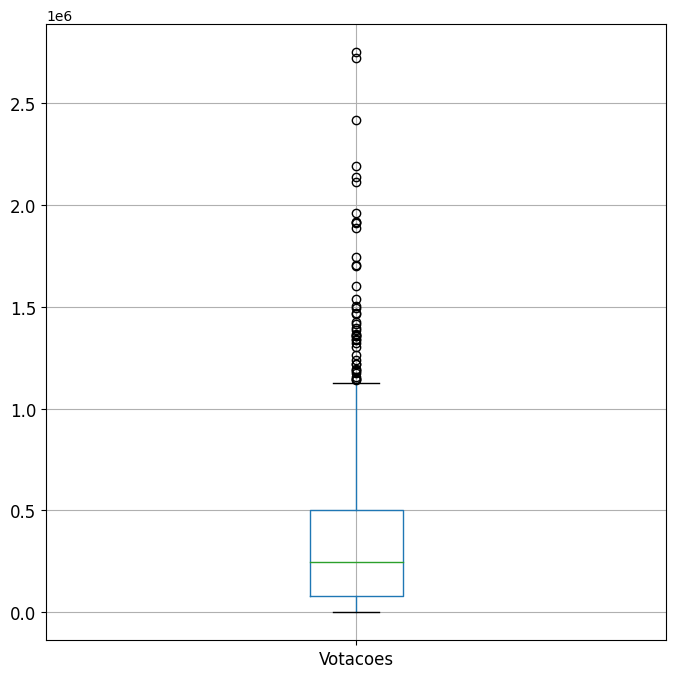

In [6]:
df_filtrado.boxplot(column=['Votacoes'], fontsize='large', figsize=(8,8))


# Histogramas

Ano


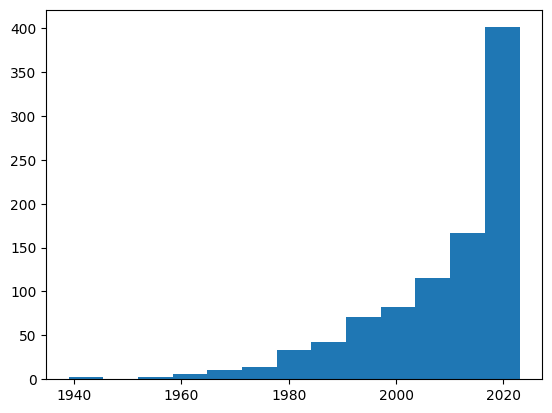


Nota


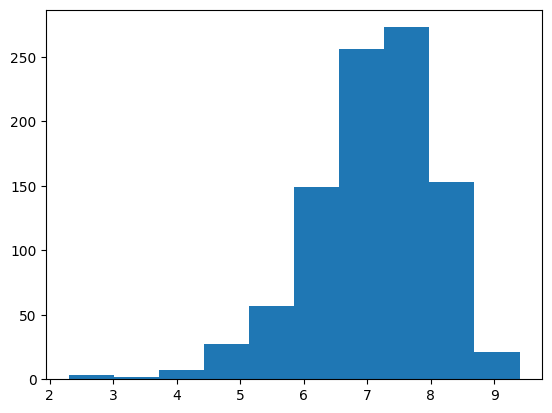


Votacões


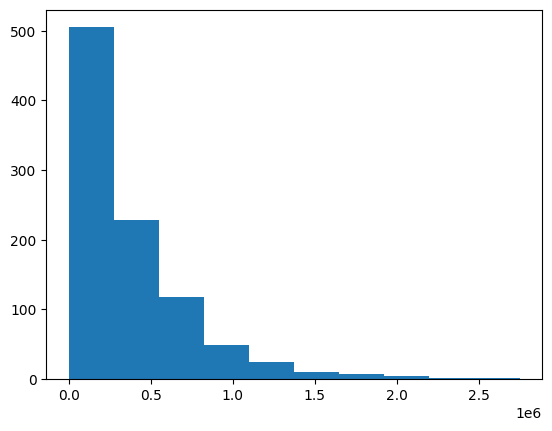

In [7]:
k = math.ceil(1 + 3.3 * math.log10( df_filtrado.size ))
print("Ano")
plt.hist(df_filtrado['Ano'], bins=k)
plt.show()
print()

print("Nota")
plt.hist(df_filtrado['Nota'])
plt.show()
print()

print("Votacões")
plt.hist(df_filtrado['Votacoes'])
plt.show()

# Tabela de frequencia

In [8]:
frequencia_ano = df_filtrado['Ano'].value_counts()
print("Ano")
print(frequencia_ano.head(40))

print("\n\n\n")
frequencia_nota = df_filtrado['Nota'].value_counts()
print("Nota")
print(frequencia_nota.head(40))

Ano
2023.0000    122
2022.0000    111
2021.0000     43
2019.0000     40
2015.0000     36
2017.0000     36
2018.0000     34
2016.0000     32
2013.0000     26
2012.0000     25
2011.0000     25
2014.0000     23
2010.0000     21
2007.0000     18
2008.0000     18
2004.0000     17
2001.0000     16
2000.0000     16
2020.0000     15
2006.0000     15
1997.0000     14
2002.0000     14
2009.0000     14
2003.0000     13
1999.0000     13
1996.0000     13
2005.0000     12
1985.0000     11
1992.0000     10
1998.0000     10
1994.0000      9
1993.0000      9
1987.0000      8
1990.0000      8
1995.0000      8
1991.0000      8
1986.0000      7
1984.0000      7
1979.0000      6
1989.0000      6
Name: Ano, dtype: int64




Nota
7.3000    50
7.8000    43
7.4000    43
6.9000    42
7.7000    42
7.1000    41
7.0000    41
7.6000    40
6.7000    38
7.2000    36
8.1000    35
6.5000    34
7.5000    31
6.8000    30
6.3000    30
6.6000    28
8.2000    28
8.0000    25
6.1000    24
7.9000    24
6.2000    22
6.4000    

# Correlação

In [1]:
import seaborn as sn
from scipy import stats
correlacao = df_filtrado.corr()
# Corelação de pearson
plot = sn.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)

spearman_nota_votacoes = stats.spearmanr(df_filtrado['Nota'],df_filtrado['Votacoes'])
spearman_ano_votacoes = stats.spearmanr(df_filtrado['Ano'],df_filtrado['Votacoes'])
spearman_ano_nota = stats.spearmanr(df_filtrado['Ano'],df_filtrado['Nota'])

print(spearman_nota_votacoes)
print(spearman_ano_votacoes)
print(spearman_ano_nota)

NameError: name 'df_filtrado' is not defined

# Teste de normalidade

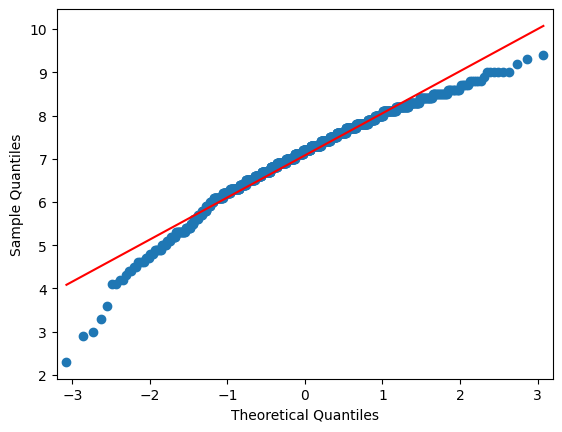

In [10]:
import statsmodels.api as sm
import pylab as py

sm.qqplot(df_filtrado['Nota'], line = 's') 
py.show() 

### Cálculo manual

In [11]:
import scipy.special as scsp
import numpy as np
def checar_normalidade(coluna):
  tab_freq = coluna.value_counts()
  xi = pd.Series(tab_freq.index)
  tab_freq.index = list(range(tab_freq.size))
  test_norm = pd.DataFrame({'Xi': xi, 'Fabs': tab_freq})
  test_norm = test_norm.sort_values(by='Xi')
  test_norm['Fac'] = test_norm['Fabs'].cumsum()
  test_norm['Frac'] = test_norm['Fac']/test_norm['Fac'].max()

  media = coluna.mean()
  dp = coluna.std()

  test_norm['Zi'] = test_norm['Xi'].apply(lambda x: (x - media)/dp)
  def zScoreToPvalue(z):
    return 0.5 * (1 + scsp.erf(z / np.sqrt(2)))
  test_norm['FracEsp'] = test_norm['Zi'].apply(lambda x: zScoreToPvalue(x))
  test_norm['D_negativo'] = abs(test_norm['FracEsp']-test_norm['Frac'])

  test_norm['D_positivo'] = 0
  for i in range(test_norm['Frac'].shape[0]):
    if i > 0:
        test_norm['D_positivo'].iloc[i] = test_norm['FracEsp'].iloc[i] - test_norm['Frac'].iloc[i-1]
    else:
        test_norm['D_positivo'].iloc[i] = test_norm['FracEsp'].iloc[i]

  D = ( test_norm[['D_negativo','D_positivo']].max() ).max()

  from scipy.stats import ksone
  def ks_critical_value(n_trials, alpha):
      return ksone.ppf(1-alpha/2, n_trials)
    
  p_value = ks_critical_value(test_norm.shape[0], 0.05)

  print(test_norm)
  print("\n\n")
  print("D = {} | p = {}".format(D, p_value))
  if D < p_value:
      print('Os dados seguem uma distribuição normal.')
  else:
      print('Os dados não seguem uma distribuição normal.')
  print("\n\n")
  return

checar_normalidade(df_filtrado['Nota'])

       Xi  Fabs  Fac   Frac      Zi  FracEsp  D_negativo  D_positivo
53 2.3000     1    1 0.0011 -4.9037   0.0000      0.0011      0.0000
57 2.9000     1    2 0.0021 -4.2879   0.0000      0.0021     -0.0010
51 3.0000     1    3 0.0032 -4.1853   0.0000      0.0032     -0.0021
48 3.3000     1    4 0.0042 -3.8774   0.0001      0.0042     -0.0031
56 3.6000     1    5 0.0053 -3.5695   0.0002      0.0051     -0.0040
46 4.1000     2    7 0.0074 -3.0564   0.0011      0.0063     -0.0042
44 4.2000     2    9 0.0095 -2.9538   0.0016      0.0079     -0.0058
49 4.3000     1   10 0.0105 -2.8511   0.0022      0.0084     -0.0073
45 4.4000     2   12 0.0127 -2.7485   0.0030      0.0097     -0.0076
47 4.5000     2   14 0.0148 -2.6459   0.0041      0.0107     -0.0086
41 4.6000     4   18 0.0190 -2.5432   0.0055      0.0135     -0.0093
43 4.7000     3   21 0.0222 -2.4406   0.0073      0.0148     -0.0117
42 4.8000     3   24 0.0253 -2.3380   0.0097      0.0156     -0.0125
34 4.9000     6   30 0.0316 -2.235

<ipython-input-11-a03175ed0153>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_norm['D_positivo'].iloc[i] = test_norm['FracEsp'].iloc[i]


### Cálculo automatico

In [12]:
y_std = stats.zscore(df_filtrado['Nota'])
print(y_std)
D, p = stats.kstest(y_std, 'norm', alternative='greater')
print("D = {} | p = {}".format(D, p))
if D < p:
    print('Os dados seguem uma distribuição normal.')
else:
    print('Os dados não seguem uma distribuição normal.')

0      0.1252
1      1.9735
2      0.8440
4     -1.0043
5      1.1521
        ...  
994   -0.1828
995    0.0225
996    0.3306
997    0.6386
998    0.3306
Name: Nota, Length: 948, dtype: float64
D = 0.039429452702121504 | p = 0.05108317224567913
Os dados seguem uma distribuição normal.


# Best Fit Distribuition

In [13]:
def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = stats.kstest(y_std, distribution, args=param)
        else:
            D, p = stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

y_std_nota = stats.zscore(df_filtrado['Nota'])
y_std_ano = stats.zscore(df_filtrado['Ano'])
y_std_votacoes = stats.zscore(df_filtrado['Votacoes'])

### Nota

In [14]:
check_distribution(dist_names, y_std_nota)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value  D<p
5      pearson3    0.0335   0.2321  yes
9   weibull_min    0.0372   0.1409  yes
0          beta    0.0426   0.0625  yes
4          norm    0.0394   0.0511  yes
6             t    0.0463   0.0332   no
10  weibull_max    0.0518   0.0118   no
3       lognorm    0.0676   0.0003   no
2         gamma    0.0771   0.0000   no
7        triang    0.2505   0.0000   no
8       uniform    0.4160   0.0000   no
1         expon    0.4294   0.0000   no


### Ano

In [15]:
check_distribution(dist_names, y_std_ano)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
5      pearson3    0.1287   0.0000  no
0          beta    0.1379   0.0000  no
10  weibull_max    0.1428   0.0000  no
3       lognorm    0.1743   0.0000  no
4          norm    0.1740   0.0000  no
2         gamma    0.1854   0.0000  no
6             t    0.1914   0.0000  no
7        triang    0.3351   0.0000  no
1         expon    0.4075   0.0000  no
8       uniform    0.5140   0.0000  no
9   weibull_min    0.7186   0.0000  no


### Votacoes

In [16]:
check_distribution(dist_names, y_std_votacoes)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
9   weibull_min    0.0624   0.0012  no
5      pearson3    0.0721   0.0001  no
2         gamma    0.0779   0.0000  no
3       lognorm    0.0785   0.0000  no
1         expon    0.0860   0.0000  no
10  weibull_max    0.0961   0.0000  no
0          beta    0.1047   0.0000  no
4          norm    0.1365   0.0000  no
6             t    0.1771   0.0000  no
7        triang    0.3228   0.0000  no
8       uniform    0.6033   0.0000  no
